In [2]:
import pandas as pd
import numpy as np

Задание 1

1. Создайте объект Series, значениями которого являются целые числа от 1 до 5, а 
индексами символы 'a', 'b', 'c', 'd', 'e'.


In [2]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

1. С помощью обращения по явному индексу получите значение 4.

In [6]:
s['d']
#s[3]

4

2. С помощью обращения по неявному индексу получите значение 2.

In [7]:
s[1]

2

3. Добавьте в серию новый элемент.

In [8]:
s['f'] = 6

4. Используя операцию среза, получите значения 3, 4, 5.

In [12]:
s['c':'e'].values

array([3, 4, 5])

5. Создайте объект DataFrame из списка [[1, 2], [5, 3], [3.7, 4.8]] с именами столбцов 
col1 и col2.

In [14]:
df = pd.DataFrame([[1, 2], [5, 3], [3.7, 4.8]], columns=['col1', 'col2'])
df

,col1,col2
0,1.0,2.0
1,5.0,3.0
2,3.7,4.8


6. Используя операцию индексации, получите элемент 3.7.

In [16]:
df['col1'][2]

3.7

7. Измените элемент 3 на 9.

In [17]:
df['col2'][1] = 9
df

,col1,col2
0,1.0,2.0
1,5.0,9.0
2,3.7,4.8


8. Используя операцию среза, получите строки с индексами 1 и 2.

In [21]:
df[1:3]

,col1,col2
1,5.0,9.0
2,3.7,4.8


9. Добавьте столбец col3, значения которого – результат поэлементного
перемножения col1 и col2.

In [22]:
df['col3'] = df['col1'] * df['col2']
df

,col1,col2,col3
0,1.0,2.0,2.00
1,5.0,9.0,45.00
2,3.7,4.8,17.76


Задание 2

In [23]:
data = [["Вжик", "Zipper the Fly", "fly", "0.7"],
["Гайка", "Gadget Hackwrench", "mouse", None],
["Дейл", "Dale", "chipmunk", "1"],
["Рокфор", "Monterey Jack", "mouse", "0.8"],
["Чип", "Chip", "chipmunk", "0.2"]]

1. На основе этого списка создайте датафрейм df так, чтобы каждому показателю 
(ru_name, en_name, class, cheer) соответствовал один столбец датафрейма. 
Проверьте, что последний столбец является числовым. Если нет, приведите его к 
типу float.


In [44]:
df = pd.DataFrame(data, columns=['ru_name', 'en_name', 'class', 'cheer'])
df.cheer = pd.to_numeric(df.cheer)
df.dtypes

ru_name     object
en_name     object
class       object
cheer      float64
dtype: object

2. Выведите число строк датафрейма df.


In [49]:
len(df)
df.shape[0]
len(df.index)

5

3. Выведите число заполненных (не NaN) ячеек в последнем столбце

In [53]:
len(df) - df.cheer.isnull().sum()

4

4. Выведите значение в ячейке, которая находится на пересечении третьей строки и 
второго столбца.

In [73]:
df.loc[2][1]

'Dale'

5. Сохраните в переменную df1 строки датафрейма df со второй по четвертую 
включительно и столбцы с первого по третий включительно. Продемонстрируйте 
содержимое df1.

In [68]:
df1 = df.loc[2:4, 'ru_name':'class']
df1

,ru_name,en_name,class
2,Дейл,Dale,chipmunk
3,Рокфор,Monterey Jack,mouse
4,Чип,Chip,chipmunk


6. Присвойте столбцам датафрейма df следующие названия: ru_name, en_name, class, 
cheer.


7. Добавьте в датафрейм df столбец logcheer, который содержит логарифмированные 
значения cheer (если в cheer встречается NaN, то и в logcheer тоже).

In [76]:
df['logcheer'] = np.log(df.cheer)
df

,ru_name,en_name,class,cheer,logcheer
0,Вжик,Zipper the Fly,fly,0.7,-0.356675
1,Гайка,Gadget Hackwrench,mouse,NaN,NaN
2,Дейл,Dale,chipmunk,1.0,0.000000
3,Рокфор,Monterey Jack,mouse,0.8,-0.223144
4,Чип,Chip,chipmunk,0.2,-1.609438


8. Сохраните массив уникальных значений столбца class в переменную x, а 
соответствующие им частоты (сколько раз значение встречается в столбце) — в 
переменную y. Используя полученные x и y, постройте столбиковую диаграмму, 
barplot, для class. Добавьте заголовок и подписи к осям.


Text(0, 0.5, 'Frequency')

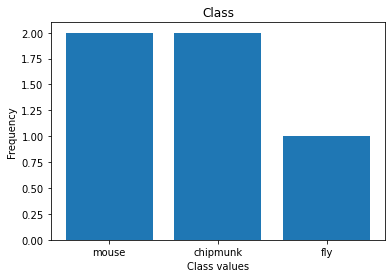

In [94]:
import matplotlib.pyplot as plt
s = df['class'].value_counts()
x = s.keys()
y = s.values
plt.bar(x, y)
plt.title('Class')
plt.xlabel('Class values')
plt.ylabel('Frequency')


Задание 3

Загрузите случайную выборку из этого набора и далее работайте с ней

In [3]:
df = pd.read_csv('./data/la-crimes-sample.csv')
df.head()

,Unnamed: 0,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,246798,100509940,2010-04-25,2010-04-25,1630,5,Harbor,529,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,740.0,NaN,NaN,NaN,CAL YACHT,MARINA SLIP D17,"(33.7753, -118.2456)"
1,1179557,151917155,2015-08-27,2015-08-27,430,19,Mission,1917,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,14000 ASTORIA ST,NaN,"(34.312, -118.4383)"
2,1527668,172008833,2017-04-04,2017-04-03,1000,20,Olympic,2021,310,BURGLARY,...,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,500 LORRAINE BL,NaN,"(34.0653, -118.32)"
3,94687,101117037,2010-08-03,2010-08-02,2120,11,Northeast,1107,624,BATTERY - SIMPLE ASSAULT,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NaN,NaN,NaN,1400 HEPNER AV,NaN,"(34.1318, -118.1957)"
4,1376548,161711262,2016-06-02,2016-06-02,1240,17,Devonshire,1764,210,ROBBERY,...,STUN GUN,IC,Invest Cont,210.0,NaN,NaN,NaN,9300 TAMPA AV,NaN,"(34.244, -118.5583)"


2. Сколько строк и столбцов в таблице?

3960 строк, 27 столбцов

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39608 entries, 0 to 39607
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              39608 non-null  int64  
 1   DR Number               39608 non-null  int64  
 2   Date Reported           39608 non-null  object 
 3   Date Occurred           39608 non-null  object 
 4   Time Occurred           39608 non-null  int64  
 5   Area ID                 39608 non-null  int64  
 6   Area Name               39608 non-null  object 
 7   Reporting District      39608 non-null  int64  
 8   Crime Code              39608 non-null  int64  
 9   Crime Code Description  39601 non-null  object 
 10  MO Codes                35317 non-null  object 
 11  Victim Age              36388 non-null  float64
 12  Victim Sex              35977 non-null  object 
 13  Victim Descent          35976 non-null  object 
 14  Premise Code            39605 non-null

3. Каковы названия столбцов? Какие типы данных у столбцов?

Типы данных: object, int64, float64

In [12]:
df.columns

Index(['Unnamed: 0', 'DR Number', 'Date Reported', 'Date Occurred',
       'Time Occurred', 'Area ID', 'Area Name', 'Reporting District',
       'Crime Code', 'Crime Code Description', 'MO Codes', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

4. Сколько в каждом из них уникальных значений?

In [18]:
for col in df.columns:
    print(col, '---\t', len(df[col].unique()))

Unnamed: 0 ---	 39608
DR Number ---	 39608
Date Reported ---	 2809
Date Occurred ---	 2808
Time Occurred ---	 900
Area ID ---	 21
Area Name ---	 21
Reporting District ---	 1135
Crime Code ---	 115
Crime Code Description ---	 114
MO Codes ---	 14020
Victim Age ---	 91
Victim Sex ---	 5
Victim Descent ---	 18
Premise Code ---	 190
Premise Description ---	 171
Weapon Used Code ---	 66
Weapon Description ---	 66
Status Code ---	 6
Status Description ---	 6
Crime Code 1 ---	 116
Crime Code 2 ---	 68
Crime Code 3 ---	 10
Crime Code 4 ---	 3
Address ---	 19762
Cross Street ---	 2065
Location  ---	 19049


5. Сколько пропущенных значений?


In [21]:
df.isnull().sum().sum()

217184

6. Верно ли, что женщины чаще оказываются жертвами по сравнению с мужчинами?

In [26]:
print(df['Victim Sex'].value_counts()['M'] < df["Victim Sex"].value_counts()['F'])

False


7. Определите 10 самых распространенных преступлений в Лос-Анджелесе. 
Постройте график.

In [6]:
crimes = df['Crime Code Description'].value_counts()
print(crimes[:10])

BATTERY - SIMPLE ASSAULT                                        3581
VEHICLE - STOLEN                                                3048
BURGLARY FROM VEHICLE                                           3038
BURGLARY                                                        2938
THEFT PLAIN - PETTY ($950 & UNDER)                              2866
THEFT OF IDENTITY                                               2522
INTIMATE PARTNER - SIMPLE ASSAULT                               2147
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114    2027
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                        1759
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                  1656
Name: Crime Code Description, dtype: int64


<AxesSubplot:>

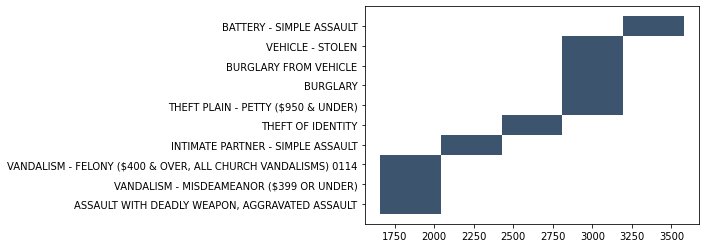

In [7]:
import seaborn as sb
sb.histplot(x = crimes.values[:10], y=crimes.index[:10])

8.От каких преступлений чаще страдают женщины, а от каких мужчины?

In [26]:
f_count = df[df['Victim Sex'] == 'F']['Crime Code'].value_counts()
m_count = df[df['Victim Sex'] == 'M']['Crime Code'].value_counts()
print('F: ', df[df['Crime Code'] == f_count.index[0]]['Crime Code Description'].values[0])
print('M: ', df[df['Crime Code'] == m_count.index[0]]['Crime Code Description'].values[0])

F:  BATTERY - SIMPLE ASSAULT
M:  BATTERY - SIMPLE ASSAULT


9. Люди какого происхождения чаще всего подвергаются преступлениям?

In [51]:
df['Victim Descent'].value_counts()[:1]

H    13488
Name: Victim Descent, dtype: int64

10. Отсортируйте районы, по количеству преступлений. Постройте график, 
показывающий самые безопасный и опасный районы.

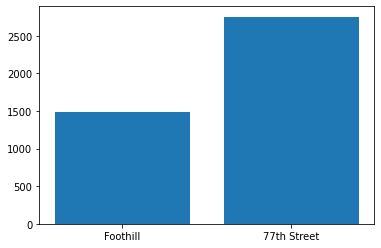

In [10]:
import matplotlib.pyplot as plt
areas = df['Area Name'].value_counts()
safe_name, safe_val = areas.index[-1], areas.values[-1]
dang_name, dang_val = areas.index[0], areas.values[0]
plt.bar([safe_name, dang_name], [safe_val, dang_val])
plt.show()
